In [14]:
import random
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange, linspace, mean
from scipy.stats import expon, zscore, norm, uniform
import math
%matplotlib inline

# 중심위치척도

##  평균,중앙값, 최빈값 구하기

In [15]:
from statistics import mean, median ,mode 

np.random.seed(0)
x = (np.random.randint(20, size = 1000)) # 0부터 19까지 랜덤으로 숫자 배열 생성

print("mean(x):", mean(x))

print("median(x):", median(x))

print("mode(x):", mode(x))

mean(x): 9
median(x): 9.0
mode(x): 3


# 변동성 척도

## 사분위수

In [16]:
 ##데이터 표본을 4개의 동일한 부분으로 나눈 값 (n은 총 도수)
      #Q1 = 1+(n-1)x0.25
      #Q2 = 중앙값
      #Q3 = 1+(n-1)x0.75

In [17]:
from statistics import quantiles # quantiles = 분위수를 계산하는 함수

x=[1,2,3,4,5,6,7,8,9,10]
print('method를 inclusive로 했을 때:', quantiles(x, method = 'inclusive')) # inclusive = 데이터를 4등분 하는 지점에서 값 출력
print('method를 exclusive로 했을 때:', quantiles(x, method = 'exclusive')) # exclusive = 데이터의 값을 포함하지 않고 값 사이에서 출력

x=np.array([1,2,3,4,5,6,7,8,9,10])
print('numpy로 계산했을 때:', np.quantile(x, [0.25, 0.5, 0.75])) # 특정 분위 수 계산

#five number summary 
q=quantiles(x, n=4, method='inclusive')
print('다섯 범위를 확인할 때', min(x), q[0], q[1], q[2], max(x) )

method를 inclusive로 했을 때: [3.25, 5.5, 7.75]
method를 exclusive로 했을 때: [2.75, 5.5, 8.25]
numpy로 계산했을 때: [3.25 5.5  7.75]
다섯 범위를 확인할 때 1 3.25 5.5 7.75 10


## 사분위간 범위(IQR)

In [18]:
x=np.array([1,2,3,4,5,6,7,8,9,10])

#x의 IQR

q=np.quantile(x,[0.25,0.5,0.75])
q[2]-q[0]  ##3사분위 수에서 1사분위수를 뺀 값

4.5

# 분산, 표준편차, 변동계수 구하기 

In [19]:
#분산, 표준편차, 변동계수 예제
from statistics import variance, stdev, mean

x=[1,2,3,4,5,6,7,8,9,10]
print('분산:',variance(x))
print('표준편차:',stdev(x))
print('변동 계수:', (stdev(x) / mean(x))*100) # 변동계수가 작을 수록 데이터의 상대적인 변동성이 낮다고 해석할 수 있다
                                               # 변동계수가 클수록 데이터의 상대적인 변동성이 높다
    

분산: 9.166666666666666
표준편차: 3.0276503540974917
변동 계수: 55.04818825631803


# 연관성 척도(붓꽃데이터 활용)

## 데이터 불러오기

In [23]:
import pandas as pd
iris = pd.read_csv('iris.csv',encoding = 'cp949') # 파일위치에 맞게 불러오기 
iris.head(5)

,150,4,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 공분산과 상관계수 구하기

In [24]:
  #공분산과 상관계수의 차이

In [26]:
#공분산은 두 변수의 편차를 곱한 평균, 상관계수는 공분산을 각 변수의 표준편차의 곱으로 나눈값

In [28]:
#분산 공분산 표
iris.cov()

,150,4,setosa,versicolor,virginica
150,0.685694,-0.042434,1.274315,0.516271,0.530872
4,-0.042434,0.189979,-0.329656,-0.121639,-0.152349
setosa,1.274315,-0.329656,3.116278,1.295609,1.372483
versicolor,0.516271,-0.121639,1.295609,0.581006,0.597315
virginica,0.530872,-0.152349,1.372483,0.597315,0.671141


In [31]:
#꽃받침 길이와 꽃받침너비의 공분산
iris.cov().iloc[:2,:2]

,150,4
150,0.685694,-0.042434
4,-0.042434,0.189979


In [30]:
#상관계수표 
iris.corr()

,150,4,setosa,versicolor,virginica
150,1.000000,-0.117570,0.871754,0.817941,0.782561
4,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
setosa,0.871754,-0.428440,1.000000,0.962865,0.949035
versicolor,0.817941,-0.366126,0.962865,1.000000,0.956547
virginica,0.782561,-0.426658,0.949035,0.956547,1.000000


# 확률분포

## 정규분포

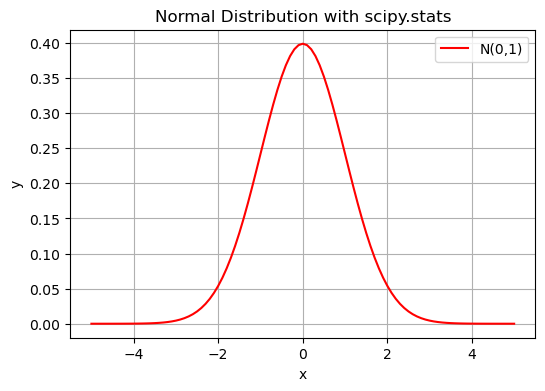

In [37]:
import scipy.stats as stats

x = np.linspace(-5,5,101)
y1 = stats.norm(0,1).pdf(x)

plt.figure(figsize=(6, 4))
plt.plot(x,y1,color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.title("Normal Distribution with scipy.stats")
plt.legend(["N(0,1)"])
plt.show()

## T 분포

In [38]:
fig=plt.figure(figsize=(4,4))

t= np.linspace(-5, 5, 101)

y1 = stats.t(1).pdf(t)
plt.plot(t, y1, color="skyblue", label = "t(1)")
plt.xlabel("t")
plt.ylabel("y")
plt.grid()
plt.title("t Distribution with scipy.stats")

y1= stats.t(3).pdf(t)
plt.plot(t, y1, color="blue"), label = "t(3)")
plt.xlabel("t")
plt.ylabel("y")
plt.grid()
plt.title("t Distribution with scipy.stats")
plt.legend(["t(3)"])

y1 = stats. t(100).pdf(t)
plt.plot(t,y1,colo="navy", label= "t(100)")

<Figure size 400x400 with 0 Axes>